In [1]:
import numpy as np

from utils import plot, score_tally

import warnings
warnings.filterwarnings("ignore")

# Where 'Dice' Fails -  *Unfair weighing of instances*

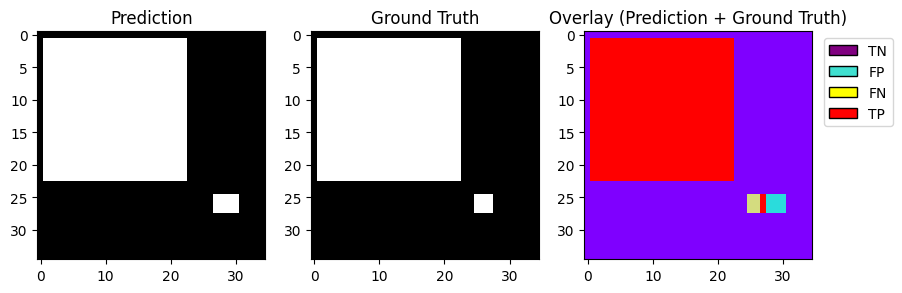

     Metric     Value
0    Legacy  0.984833
1     BraTS  0.642857
2        PQ  0.642857
3  Proposed  0.642857


In [2]:
pred = np.zeros((10, 35, 35))
gt   = np.zeros((10, 35, 35))

pred[0, 1:23, 1:23] = 1
gt[0, 1:23, 1:23] = 1

pred[0, 25:28, 27:31] = 1
gt[0, 25:28, 25:28] = 1

plot(pred, gt*2)
score_tally(pred, gt)

# Where Panoptic Quality & Lesion-wise Dice Fails - *2 Ground Truths and 1 Prediction*

<ins> Panoptic quality fails </ins> because they do not take into accoutn multiple ground truths: (below from the paper itself)

(1) during matching, group regions are not used, and 

(2) after matching, unmatched predicted segments that contain a fraction of pixels from a group of the same class over the matching threshold are removed and do not count as false positives.

<ins> Lesion-wise Dice fails </ins> because the ground prediction is matched to both, and hence the false positive is being penalised twice.

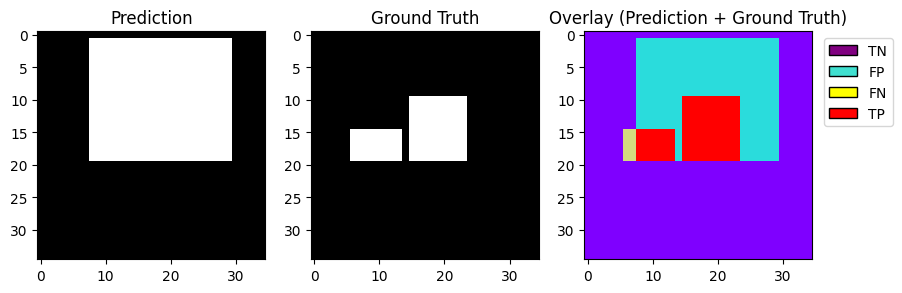

     Metric     Value
0    Legacy  0.437956
1     BraTS  0.242668
2        PQ  0.354331
3  Proposed  0.437956


In [3]:
pred = np.zeros((10, 35, 35))
gt   = np.zeros((10, 35, 35))

gt[0, 15:20, 6:14] = 1
gt[0, 10:20, 15:24] = 1
pred[0, 1:20, 8:30] = 1

plot(pred, gt*2)
score_tally(pred, gt)

# Lesion-wise Dice and Panoptic Quality are assymmetrical; Cluster Dice is not

Also a representation of the combination of failure cases.

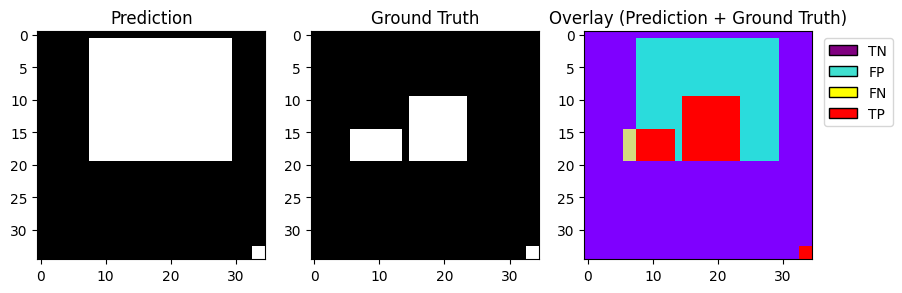

     Metric     Value
0    Legacy  0.446043
1     BraTS  0.495112
2        PQ  0.677165
3  Proposed  0.718978


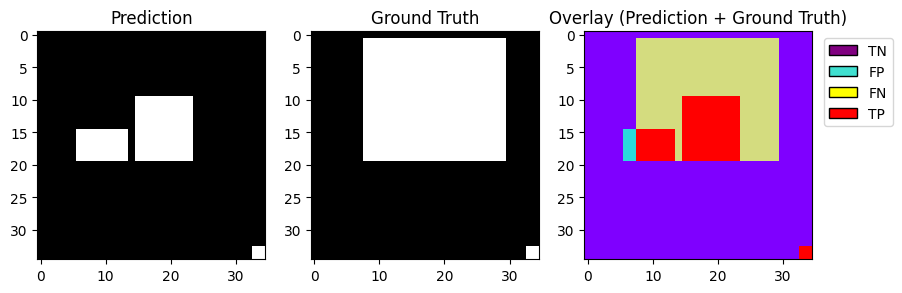

     Metric     Value
0    Legacy  0.446043
1     BraTS  0.718978
2        PQ  0.718978
3  Proposed  0.718978


In [4]:
pred = np.zeros((10, 35, 35))
gt   = np.zeros((10, 35, 35))

gt[0, 15:20, 6:14] = 1
gt[0, 10:20, 15:24] = 1
pred[0, 1:20, 8:30] = 1

#standalone prediction
gt[0, 33:35, 33:35] = 1
pred[0, 33:35, 33:35] = 1

plot(pred, gt*2)
score_tally(pred, gt)

###################################

pred = np.zeros((10, 35, 35))
gt   = np.zeros((10, 35, 35))

pred[0, 15:20, 6:14] = 1
pred[0, 10:20, 15:24] = 1
gt[0, 1:20, 8:30] = 1

#standalone prediction
gt[0, 33:35, 33:35] = 1
pred[0, 33:35, 33:35] = 1

plot(pred, gt*2)
score_tally(pred, gt)

# Where All perform equally - 2 Predictions on 1 Ground Truth 

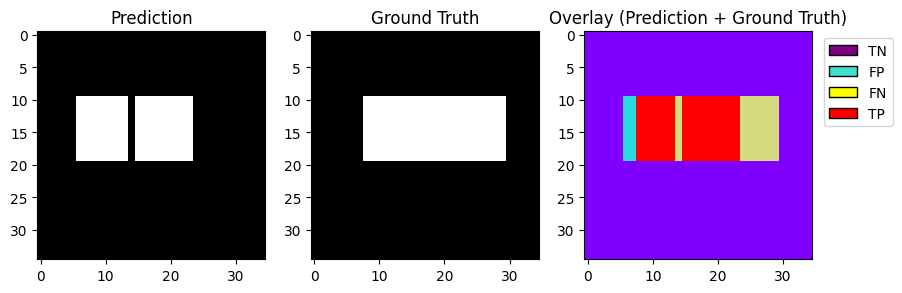

     Metric     Value
0    Legacy  0.769231
1     BraTS  0.769231
2        PQ  0.769231
3  Proposed  0.769231


In [5]:
pred = np.zeros((10, 35, 35))
gt   = np.zeros((10, 35, 35))

#half of the prediction is correct
pred[0, 10:20, 6:14] = 1
pred[0, 10:20, 15:24] = 1
gt[0, 10:20, 8:30] = 1

plot(pred, gt*2)
score_tally(pred, gt)

# Cluster Dice ensures proper pixel-wsie assignment

In the below case: Representation of improper pixel-wise assignment. 

Taking the bottom GT lesion, it will be assigned the bottom two Pred lesions. However, that will cause the edge pixels, which are actually true positive to be calculated as false positives. This is not reflected in the "component" wise assignment but on a pixel level, they are treated seperately. This does occur in C-Dice as it is evaluated as a whole.

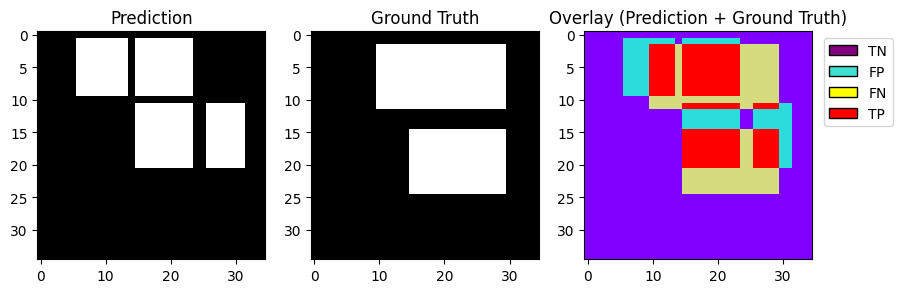

     Metric     Value
0    Legacy  0.597243
1     BraTS  0.492604
2        PQ  0.554618
3  Proposed  0.597243


In [6]:
pred = np.zeros((10, 35, 35))
gt   = np.zeros((10, 35, 35))

pred[0, 1:10, 6:14] = 1
pred[0, 1:10, 15:24] = 1
pred[0, 11:21, 15:24] = 1
pred[0, 11:21, 26:32] = 1

gt[0, 2:12, 10:30] = 1
gt[0, 15:25, 15:30] = 1

plot(pred, gt*2)
score_tally(pred, gt)

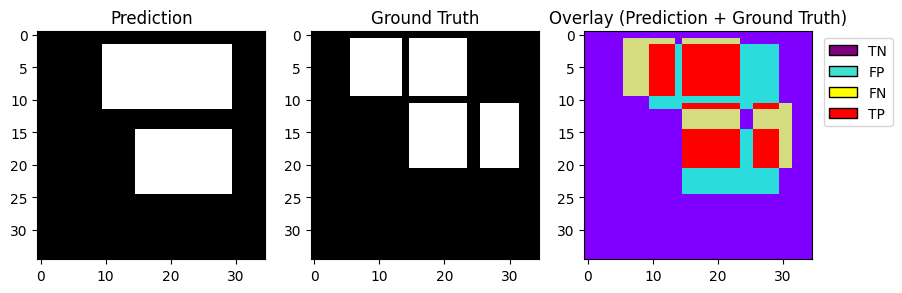

     Metric     Value
0    Legacy  0.597243
1     BraTS  0.292675
2        PQ  0.366347
3  Proposed  0.597243


In [7]:
pred = np.zeros((10, 35, 35))
gt   = np.zeros((10, 35, 35))

gt[0, 1:10, 6:14] = 1
gt[0, 1:10, 15:24] = 1
gt[0, 11:21, 15:24] = 1
gt[0, 11:21, 26:32] = 1

pred[0, 2:12, 10:30] = 1
pred[0, 15:25, 15:30] = 1

plot(pred, gt*2)
score_tally(pred, gt)

# Cluster dice is more sensitive to false-positives

The reduction in panoptic quality and lesion dice is much less as opposed to instance dice.

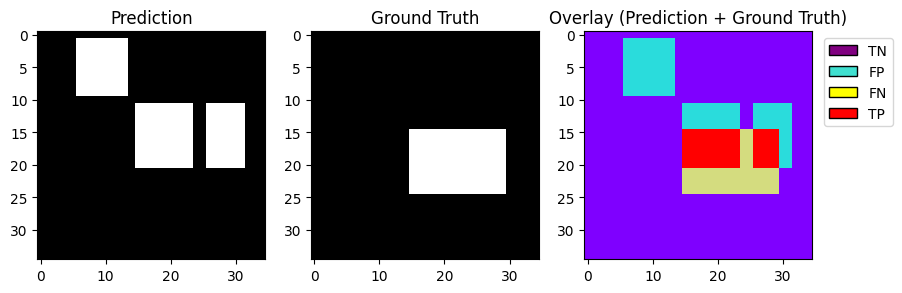

     Metric     Value
0    Legacy  0.419355
1     BraTS  0.260000
2        PQ  0.346667
3  Proposed  0.260000


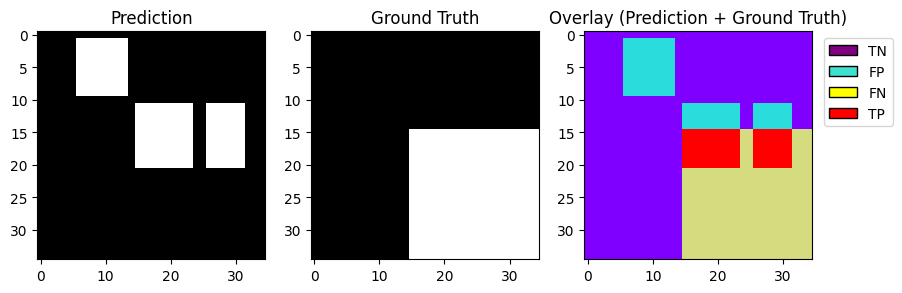

     Metric     Value
0    Legacy  0.289389
1     BraTS  0.163636
2        PQ  0.218182
3  Proposed  0.163636


In [8]:
pred = np.zeros((10, 35, 35))
gt   = np.zeros((10, 35, 35))

pred[0, 1:10, 6:14] = 1

pred[0, 11:21, 15:24] = 1
pred[0, 11:21, 26:32] = 1

gt[0, 15:25, 15:30] = 1

plot(pred, gt*2)
score_tally(pred, gt)

##############################

pred = np.zeros((10, 35, 35))
gt   = np.zeros((10, 35, 35))

pred[0, 1:10, 6:14] = 1

pred[0, 11:21, 15:24] = 1
pred[0, 11:21, 26:32] = 1

gt[0, 15:35, 15:35] = 1

plot(pred, gt*2)
score_tally(pred, gt)

# Aaron's Case

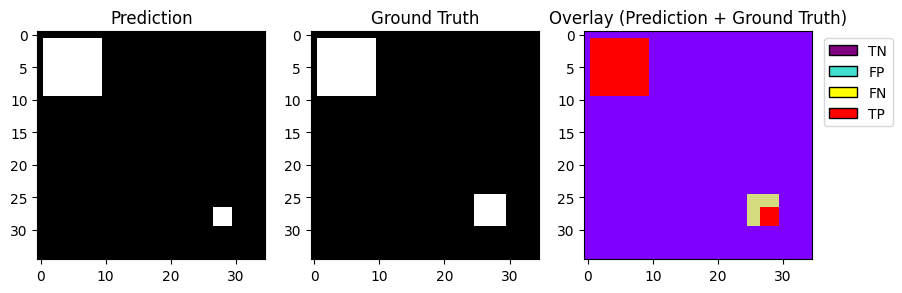

     Metric     Value
0    Legacy  0.918367
1     BraTS  0.764706
2        PQ  0.764706
3  Proposed  0.764706


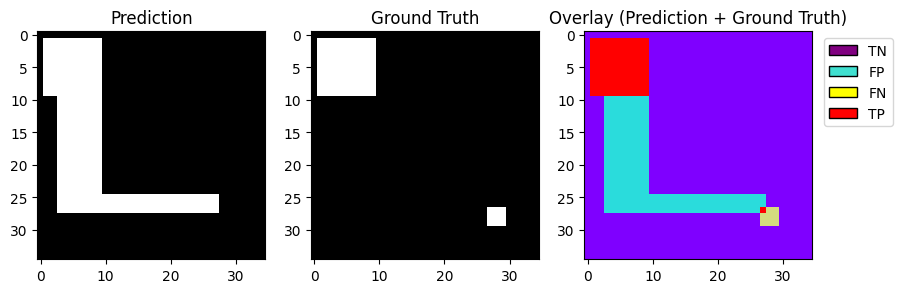

     Metric     Value
0    Legacy  0.467236
1     BraTS  0.240546
2        PQ  0.473684
3  Proposed  0.467236


In [9]:
pred = np.zeros((10, 35, 35))
gt   = np.zeros((10, 35, 35))

pred[0, 1:10, 1:10] = 1
gt [0, 1:10, 1:10] = 1

pred[0, 27:30, 27:30] = 1
gt [0, 25:30, 25:30] = 1

plot(pred, gt*2)
score_tally(pred, gt)

##############################


pred = np.zeros((10, 35, 35))
gt   = np.zeros((10, 35, 35))

gt[0, 1:10, 1:10] = 1
pred [0, 1:10, 1:10] = 1

gt[0, 27:30, 27:30] = 1

pred [0, 25:28, 25:28] = 1
pred [0, 25:28, 3:28] = 1
pred [0, 3:28, 3:10] = 1

plot(pred, gt*2)
score_tally(pred, gt)

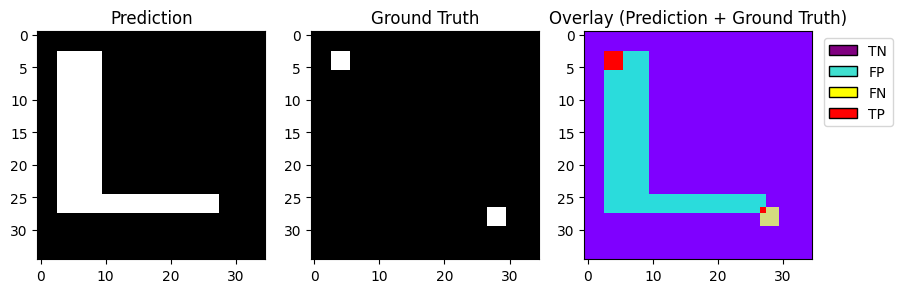

     Metric     Value
0    Legacy  0.080972
1     BraTS  0.042017
2        PQ  0.075630
3  Proposed  0.080972


In [10]:
pred = np.zeros((10, 35, 35))
gt   = np.zeros((10, 35, 35))

gt[0, 3:6, 3:6] = 1
pred [0, 3:6, 3:6] = 1

gt[0, 27:30, 27:30] = 1

pred [0, 25:28, 25:28] = 1
pred [0, 25:28, 3:28] = 1
pred [0, 3:28, 3:10] = 1

plot(pred, gt*2)
score_tally(pred, gt)